**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [9]:
load_boston().keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [23]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [24]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [25]:
data=housing['data']
target=housing['target']
feature_names=housing['feature_names']

In [26]:
x=pd.DataFrame(data, columns=feature_names)
y=pd.DataFrame(target, columns=['price'])

In [56]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [59]:
x_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


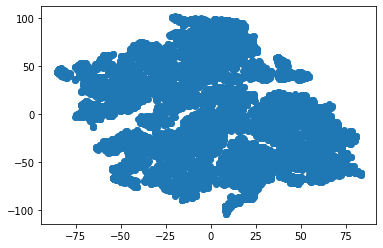

In [64]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)

In [77]:
labels_train=kmeans.fit_predict(x_train_tsne)

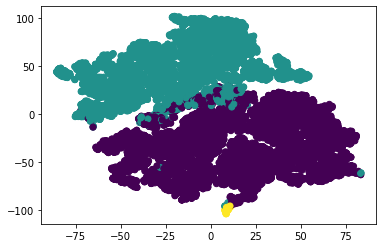

In [74]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

In [84]:
set(labels_train)

{0, 1, 2}

In [90]:
print(f' средние значения price : {y_train[labels_train==0].mean()} , {y_train[labels_train==1].mean()}, {y_train[labels_train==2].mean()}')


 средние значения price : price    2.141764
dtype: float64 , price    1.980364
dtype: float64, price    1.618831
dtype: float64


In [99]:
x_train['MedInc'][labels_train==0].mean(), x_train['MedInc'][labels_train==1].mean(), x_train['MedInc'][labels_train==2].mean()

(3.925700042038886, 3.824162261973456, 3.336701538461538)

In [100]:
print('Кластер 0: {}'.format(x_train.loc[labels_train == 0, 'MedInc'].mean()))
print('Кластер 1: {}'.format(x_train.loc[labels_train == 1, 'MedInc'].mean()))
print('Кластер 2: {}'.format(x_train.loc[labels_train == 2, 'MedInc'].mean()))

Кластер 0: 3.925700042038886
Кластер 1: 3.824162261973456
Кластер 2: 3.336701538461538


**Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [102]:
x_test_tsne = tsne.fit_transform(x_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [107]:
labels_test=kmeans.fit_predict(x_test_tsne)


array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [114]:
x_test['MedInc'][labels_test==0].mean(), x_test['MedInc'][labels_test==1].mean(), x_test['MedInc'][labels_test==2].mean()

(4.613089839572193, 3.640214011299435, 3.174377311725453)

In [115]:
print(f' средние значения price : {y_test[labels_test==0].mean()} , {y_test[labels_test==1].mean()}, {y_test[labels_test==2].mean()}')


 средние значения price : price    2.520816
dtype: float64 , price    1.892156
dtype: float64, price    1.748511
dtype: float64
